In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [44]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [45]:
import tensorflow as tf

In [46]:
df = pd.read_excel('mtnd.xlsx')
df = df.sample(frac=1).values
X = df[:, 4:]
y = df[:, 1:4] / 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
scaler = StandardScaler()


In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
y_train.shape

(160, 3)

In [50]:
model = Sequential()
model.add(Dense(units = 8, activation = "tanh"))
model.add(Dense(units = y_train.shape[1]))

In [51]:
learning_rate = 0.01  # Tốc độ học ban đầu
decay_steps = 1000          # Số epoch để áp dụng decay
decay_rate = 0.5            # Tỷ lệ giảm learning rate

# Khởi tạo learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(learning_rate, decay_steps, decay_rate)
optimizer1 = tf.keras.optimizers.Adam(learning_rate = lr_scheduler)

In [52]:
model.compile(optimizer= optimizer1, loss = tf.keras.losses.mse, metrics = ['mse'])

In [53]:
history = model.fit( X_train, y_train, epochs = 12000, validation_data = (X_test, y_test))

Epoch 1/12000
5/5 [==============================] - 0s 25ms/step - loss: 3.3853 - mse: 3.3853 - val_loss: 2.4588 - val_mse: 2.4588
Epoch 2/12000
5/5 [==============================] - 0s 6ms/step - loss: 1.9836 - mse: 1.9836 - val_loss: 1.9146 - val_mse: 1.9146
Epoch 3/12000
5/5 [==============================] - 0s 6ms/step - loss: 1.5065 - mse: 1.5065 - val_loss: 1.3289 - val_mse: 1.3289
Epoch 4/12000
5/5 [==============================] - 0s 6ms/step - loss: 1.0123 - mse: 1.0123 - val_loss: 0.8718 - val_mse: 0.8718
Epoch 5/12000
5/5 [==============================] - 0s 6ms/step - loss: 0.7393 - mse: 0.7393 - val_loss: 0.6990 - val_mse: 0.6990
Epoch 6/12000
5/5 [==============================] - 0s 7ms/step - loss: 0.6521 - mse: 0.6521 - val_loss: 0.7444 - val_mse: 0.7444
Epoch 7/12000
5/5 [==============================] - 0s 7ms/step - loss: 0.6479 - mse: 0.6479 - val_loss: 0.6600 - val_mse: 0.6600
Epoch 8/12000
5/5 [==============================] - 0s 6ms/step - loss: 0.5613 - 

KeyboardInterrupt: 

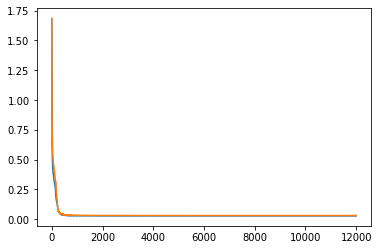

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
print(pd.DataFrame(np.concatenate((model.predict(X_test) * 10, y_test * 10), axis = 1)))

2/2 [==============================] - 0s 3ms/step
            0          1             2     3     4     5
0   11.722536   4.152957  1.481754e+01  12.0   4.0  13.6
1    0.017603   0.131955  2.828504e-30   0.0   0.0   0.0
2   17.708630   4.819793  4.403694e+00  16.8   4.8   1.6
3   29.463772  12.686753  1.501466e+01  28.8  18.4  17.6
4    0.108342   9.581160  8.666015e+00   1.6   9.6   6.4
5   22.799648  10.453636  1.794301e+01  23.2   8.8  16.8
6    2.936283  19.314100  1.901622e+01   3.2  19.2  21.6
7   21.047104   2.140552  6.672582e+00  20.8   4.0   7.2
8    0.034002   0.006739  2.618328e-30   0.0   0.0   0.0
9   11.004761  12.369026  2.209231e+01   8.8  22.4  23.2
10   8.188811  23.809761  2.314827e+01   8.0  25.6  20.0
11  25.232700  17.789410  1.226392e+01  24.0  21.6  11.2
12  17.005545   7.862456  1.085675e+01  17.6   4.8   8.0
13   0.997941   0.014587  4.583991e-30   0.0   0.0   0.0
14  14.124246  18.779150  5.949408e+00  14.4  17.6   4.8
15  16.741360  17.988827  1.041750e+0

2/2 [==============================] - 0s 2ms/step


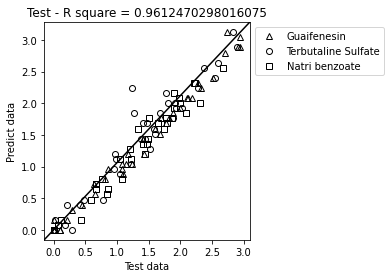

In [ ]:
ANN_pred = model.predict(X_test)
plt.plot(ANN_pred[:, 0], y_test[:, 0], "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(ANN_pred[:, 1], y_test[:, 1], "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(ANN_pred[:, 2], y_test[:, 2], "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Test data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"Test - R square = {r2_score(y_test, ANN_pred)}")
plt.show()

5/5 [==============================] - 0s 1ms/step


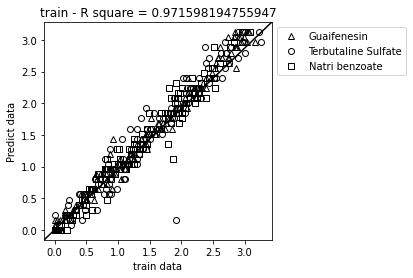

In [ ]:
ANN_pred = model.predict(X_train)
plt.plot(ANN_pred[:, 0], y_train[:, 0], "^", label = "Guaifenesin", color = "black", fillstyle='none')
plt.plot(ANN_pred[:, 1], y_train[:, 1], "o", label = "Terbutaline Sulfate", color = "black", fillstyle='none')
plt.plot(ANN_pred[:, 2], y_train[:, 2], "s", label = "Natri benzoate", color = "black", fillstyle='none')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("train data")
plt.ylabel("Predict data")
plt.xticks(np.arange(3.5, step=0.5))
plt.yticks(np.arange(3.5, step=0.5))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color = "black")
plt.title(f"train - R square = {r2_score(y_train, ANN_pred)}")
plt.show()

In [ ]:
mauthuoc = pd.read_excel("mauthuoc.xlsx")
mauthuoc = scaler.transform(mauthuoc.iloc[:,1:].values)
model.predict(mauthuoc) * 10

1/1 [==============================] - 0s 15ms/step


array([[42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537],
       [42.946037,  9.319424, 11.251537]], dtype=float32)